# ES_12_2 & ES_12_3


Nell'ultima parte dell'esercitazione è stato chiesto di modificare il codice in modo da utilizzare le reti convoluzionali, con l'obiettivo di riconoscere il set di 10 cifre scritte direttamente dagli utilizzatori del codice. <br>
Per disegnare i numeri è stato utilizzato il software gimp. <br>
I risultati ottenuti mostrano che sono stati riconosciute 7 cirfe su 10. Questo può essere stato influenzato, oltre che dai parametri con cui la rete è stata allenata, anche dalla personale grafia con cui i numeri sono stati disegnati. 

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

In [2]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

Using TensorFlow backend.


X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


an example of a data point with label 2


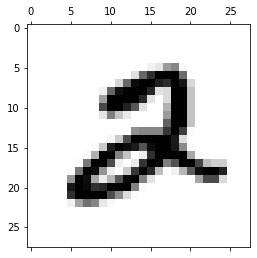

an example of a data point with label 2 before to_categorical ...
... and with label [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [3]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[5])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[5,:].reshape(28,28),cmap='binary')
plt.show()

print('an example of a data point with label', Y_train[5], 'before to_categorical ...')
# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[5], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

def create_DNN():
    # instantiate model
    model = Sequential()
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [5]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adam(),
                  #optimizer=RMSprop(),
                  metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [6]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D, AveragePooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [7]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(20, kernel_size=(5, 5),
              activation='relu',
              input_shape=input_shape))
    #
    # ADD HERE SOME OTHER LAYERS AT YOUR WILL, FOR EXAMPLE SOME: Dropout, 2D pooling, 2D convolutional etc. ... 
    # remember to move towards a standard flat layer in the final part of your DNN,
    # and that we need a soft-max layer with num_classes=10 possible outputs
    #
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.5))
    model.add(Conv2D(32, kernel_size=(3,3),
              activation='relu',
              input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(32, kernel_size=(2,2), 
              activation='relu'))
    model.add(MaxPooling2D(pool_size=(1,1)))
    model.add(Conv2D(16, kernel_size=(1,1), 
              activation='relu'))
    model.add(MaxPooling2D(pool_size=(1,1)))
    
    model.add(Flatten())
    model.add(Dense(10, activation="softmax"))
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='RMSprop',
                  metrics=['accuracy'])
    return model

In [8]:
# training parameters
batch_size = 64
epochs = 15

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2021-09-23 07:54:31.495506: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-23 07:54:31.496627: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 217s 4ms/step - loss: 0.4741 - accuracy: 0.8492 - val_loss: 0.1394 - val_accuracy: 0.9560
Epoch 2/15
60000/60000 [==============================] - 189s 3ms/step - loss: 0.1606 - accuracy: 0.9506 - val_loss: 0.0705 - val_accuracy: 0.9784
Epoch 3/15
60000/60000 [==============================] - 131s 2ms/step - loss: 0.1181 - accuracy: 0.9629 - val_loss: 0.0541 - val_accuracy: 0.9821
Epoch 4/15
60000/60000 [==============================] - 124s 2ms/step - loss: 0.0988 - accuracy: 0.9693 - val_loss: 0.0487 - val_accuracy: 0.9843
Epoch 5/15
60000/60000 [==============================] - 103s 2ms/step - loss: 0.0880 - accuracy: 0.9725 - val_loss: 0.0415 - val_accuracy: 0.9868
Epoch 6/15
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0786 - accuracy: 0.9749 - val_loss: 0.0417 - val_accuracy: 0.9876
Epoch 7/15
60000/60000 [==============================] - 103s

10000/10000 [==============================] - 6s 626us/step

Test loss: 0.025834624754759717
Test accuracy: 0.9905999898910522


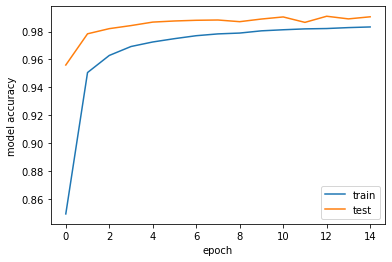

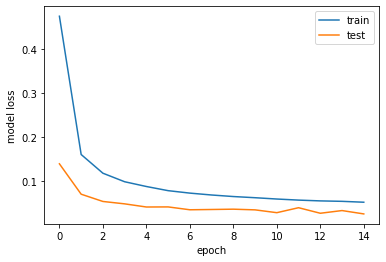

In [9]:
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

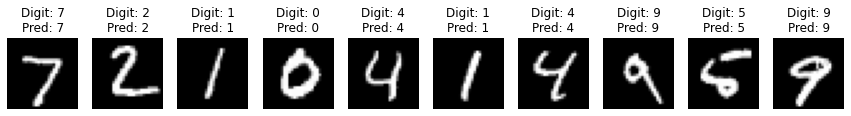

In [13]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPred: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

# Exercise 12.3

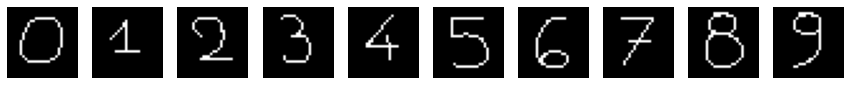

(10, 28, 28)


In [11]:
from PIL import Image
import os

full_data=np.zeros((10,28,28))
plt.figure(figsize=(15,15))

for k in range(10):
    digit_filename = "./"+str(k)+".png"
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255
    full_data[k,:,:] = data
    ax = plt.subplot(2, 10, k + 1)    
    plt.imshow(full_data[k, :, :], cmap='gray')       
    plt.axis('off') 
    
plt.imshow(data, cmap='gray')
plt.show()

print(full_data.shape)

(10, 28, 28, 1)


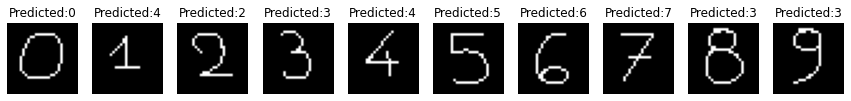

In [12]:
full_data = full_data.reshape(10,xdim,ydim,1)
print(full_data.shape)
pred_0 = model_CNN.predict(full_data)

full_data = full_data.reshape(10,xdim,ydim)
plt.figure(figsize=(15, 15))  

for k in range(10):
    ax = plt.subplot(2, 10, k + 1)    
    plt.imshow(full_data[k, :, :], cmap='gray')    
    plt.title("Predicted:{}".format(np.argmax(pred_0[k])))    
    plt.axis('off') 

plt.show()